Test the following hypotheses:

Older people are not as tech-savvy and probably prefer shopping in-store.
-   Given the data we must reject the null hypothesis.

Customers with kids probably have less time to visit a store and would prefer to shop online.
-   Given the data we must reject the null hypothesis.

Other distribution channels may cannibalize sales at the store.
-   Reject the null hypothesis, web and catalog sales do impact sales at the store.

Does the US fare significantly better than the rest of the world in terms of total purchases?
-   Fail to reject the null hypothesis, number of US purchases = number of non-US purchases.

Use appropriate visualization to help analyze the following:

Which products are performing the best, and which are performing the least in terms of revenue?
-   Wines are doing the best.

Is there any pattern between the age of customers and the last campaign acceptance rate?
-   The data shows no pattern between the age of the custome and rate of acceptance.

Which Country has the greatest number of customers who accepted the last campaign?
-   Spain

Do you see any pattern in the no. of children at home and total spend?
-   The total spending actually seems to go down as the number of children increase.

Education background of the customers who complained in the last 2 years.
-   Mostly Bachelor grads.

In [163]:
import pandas as pd
import numpy as np
import pycountry
import datetime
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.multivariate.manova import MANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings('ignore')

In [164]:
df = pd.read_csv('marketing_data.csv',parse_dates = True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [165]:
response_rate = df.groupby("Country").sum()["Response"].sort_values(ascending=False)
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')
df['Education'] = df['Education'].replace('Graduation', 'Bachelor')
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
df.rename(columns={' Income ':'Income'},inplace=True)
df['Income'] = df['Income'].str.replace('$','').str.replace(',','').astype(float)
df['Age'] = datetime.now().year - df['Year_Birth']
df['Dependents'] = df['Kidhome'] + df['Teenhome']
df['TotalSpending'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Dependents,TotalSpending
0,1826,1970,Bachelor,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,54,0,1190
1,1,1961,Bachelor,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,63,0,577
2,10476,1958,Bachelor,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,66,1,251
3,1386,1967,Bachelor,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,57,2,11
4,5371,1989,Bachelor,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,35,1,91


Combined un needed martial types added age, total number of kids (dependents), and total spending variables

In [166]:
df.isnull().sum()   

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Age                     0
Dependents              0
TotalSpending           0
dtype: int64

In [167]:
df['Income'] = df.groupby(['Education','Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

Filled in all NaN Incomes with a generated mean for the Education and Marital Type

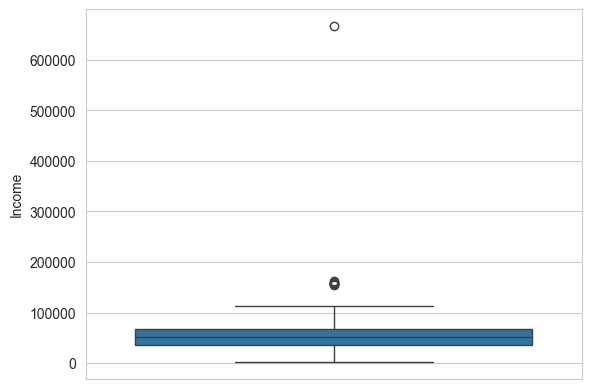

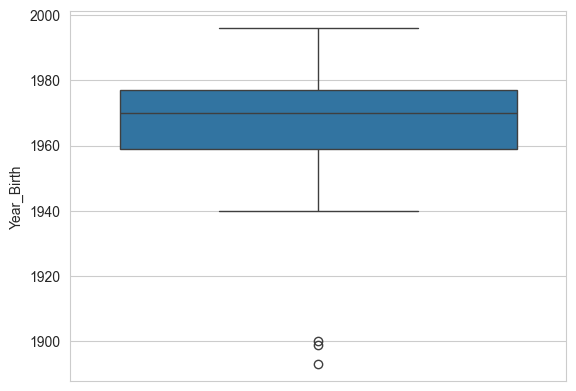

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Dependents,TotalSpending
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229,2229.000000,2229.000000,2229.000000,2229.000000,...,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,5589.296097,1968.888739,51630.201065,0.444594,0.507402,2013-07-10 05:20:25.841184512,49.106326,304.991476,26.348587,165.283984,...,0.073127,0.074921,0.072678,0.064603,0.013459,0.149843,0.008973,55.111261,0.951996,605.541050
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,5.000000
25%,2829.000000,1959.000000,35416.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,69.000000
50%,5455.000000,1970.000000,51365.633065,0.000000,0.000000,2013-07-08 00:00:00,49.000000,176.000000,8.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1.000000,397.000000
75%,8420.000000,1977.000000,68118.000000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,505.000000,33.000000,231.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1.000000,1044.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,3.000000,2525.000000
std,3244.840538,11.707430,20603.994617,0.538636,0.544735,NaN,28.946476,336.761943,39.764060,219.336589,...,0.260403,0.263324,0.259666,0.245879,0.115255,0.356998,0.094319,11.707430,0.751976,601.032228


In [168]:
sns.boxplot(df["Income"])
plt.show()

sns.boxplot(df['Year_Birth'])
plt.show()

df['Income'].describe()
Q1, Q3 = np.percentile(df["Income"],[25,75])
irq = Q3 - Q1
income_upper = Q3 + 1.5*irq
income_lower = Q1 - 1.5*irq


df['Year_Birth'].describe()
Q1, Q3 = np.percentile(df["Year_Birth"],[25,75])
irq = Q3 - Q1
birth_upper = ( Q3 + 1.5*irq)
birth_lower = ( Q1 - 1.5*irq)


df.drop(df[(df['Year_Birth'] > birth_upper ) | (df['Year_Birth'] < birth_lower)].index, inplace=True)
df.drop(df[(df['Income'] > income_upper ) | (df['Income'] < income_lower)].index, inplace=True)

df.describe()

Checked and removed outliers for years of birth and income, using box boxplots

In [169]:
# Check for missing items again
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Age                    0
Dependents             0
TotalSpending          0
dtype: int64

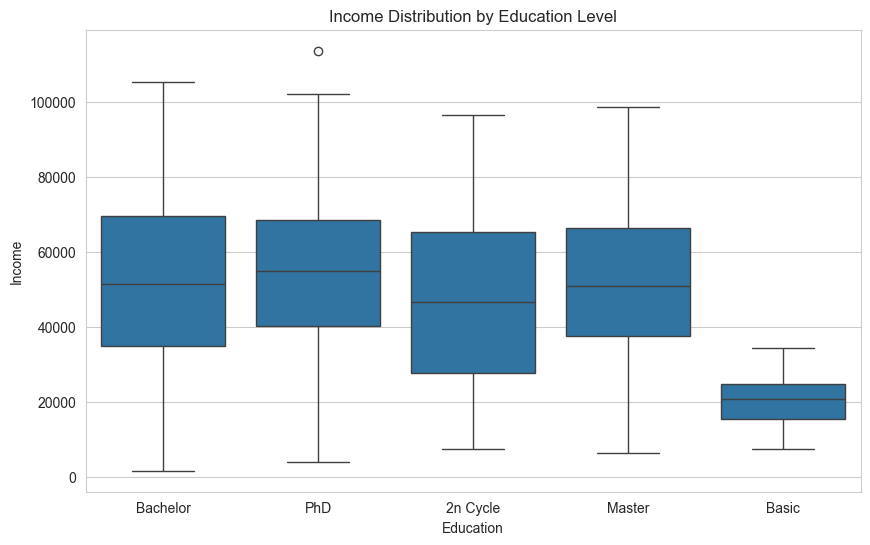

In [170]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income Distribution by Education Level')
plt.show()

In [171]:
# Apply requirements for encoding both one hot and ordinal #
## One hot encoding ##
df = pd.get_dummies(df, columns=['Marital_Status'], prefix=['Marital'])
df = pd.get_dummies(df, columns=['Country'], prefix=['Country'])

## Ordinal encoding ##
education_mapping = {
    'Basic': 1,
    '2n Cycle': 2,
    'Bachelor': 3,
    'Master': 4,
    'PhD': 5
}
df['Education'] = df['Education'].map(education_mapping)

In [172]:
## Lets start to look at the data ## 
childCount = ["One","None","Two","Three"]
totalChildCount = df['Dependents'].value_counts().tolist()
fig = px.pie(values=totalChildCount, names=childCount,color_discrete_sequence=px.colors.sequential.dense )
fig.update_layout(title_text='Percentage of Number of Dependents', title_x=0.5)
fig.show()

totals = [
    df['Marital_Divorced'].sum(),
    df['Marital_Married'].sum(),
    df['Marital_Single'].sum(),
    df['Marital_Together'].sum(),
    df['Marital_Widow'].sum(),
]
Status = ['Divorced' ,'Married','Single','Together',"Widow"]
figM = px.pie(values=totals, names=Status,color_discrete_sequence=px.colors.sequential.dense )
figM.update_layout(title_text='Percentage of Marital Status', title_x=0.5)
figM.show()

counts = df['Education'].value_counts().tolist()
values = ['Bachelor','PhD','Master','2n Cycle','Basic']
figE = px.pie(values=counts, names=values,color_discrete_sequence=px.colors.sequential.dense )
figE.update_layout(title_text='Percentage of Education', title_x=0.5)
figE.show()

totPurchases = [
    df['NumWebPurchases'].sum(),
    df['NumCatalogPurchases'].sum(),
    df['NumStorePurchases'].sum()
]
types = ['Web', 'Catalog', ' Store']
figP = px.pie(values=totPurchases, names=types,color_discrete_sequence=px.colors.sequential.dense )
figP.update_layout(title_text='Percentage of Purchase types', title_x=0.5)
figP.show()

totProducts = [
    df['MntWines'].sum(),
    df['MntFruits'].sum(),
    df['MntMeatProducts'].sum(),
    df['MntFishProducts'].sum(),
    df['MntSweetProducts'].sum(),
    df['MntGoldProds'].sum()
]
products = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
figPro = px.pie(values=totProducts, names=products,color_discrete_sequence=px.colors.sequential.dense )
figPro.update_layout(title_text='Percentage of Purchased Items', title_x=0.5)
figPro.show()

ccounts = df['Complain'].value_counts().tolist()
ctypes = ["Never Complained","Complained"]
figC = px.pie(values=ccounts, names=ctypes,color_discrete_sequence=px.colors.sequential.dense )
figC.update_layout(title_text='Population of Complains', title_x=0.5)
figC.show()

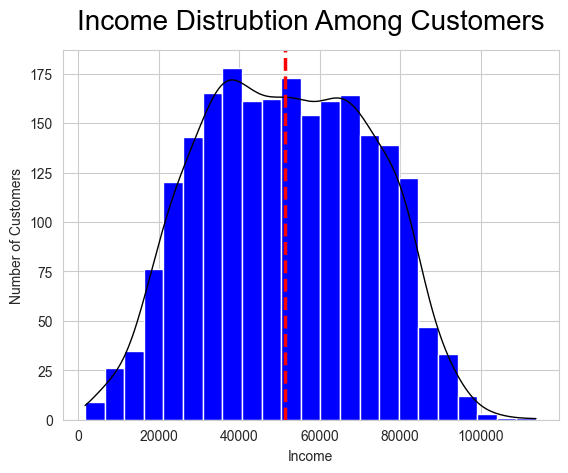

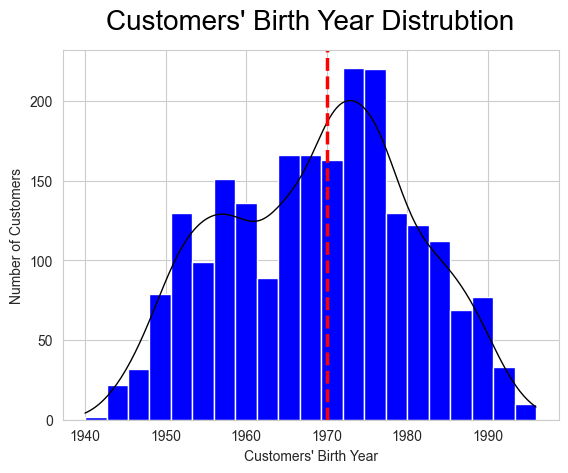

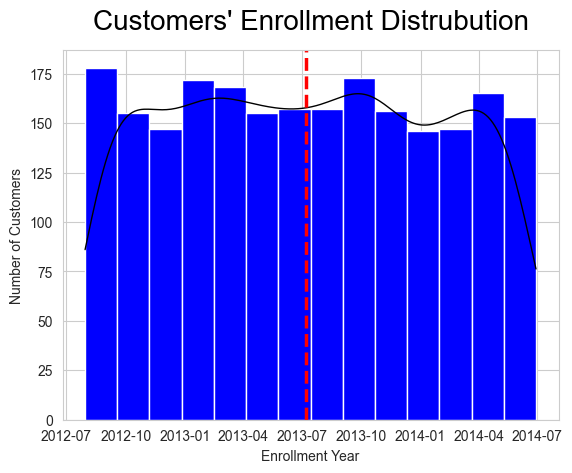

In [173]:
medianIncome = np.median(df['Income'])
MIax = sns.histplot(data=df['Income'], bins="auto", stat='count', alpha= 1, kde=True, edgecolor='white', linewidth=1,color='blue', line_kws=dict(linewidth=1))
MIax.get_lines()[0].set_color('black')
plt.axvline(medianIncome, color="red", ls='--', lw=2.5)
MIax.set_title('Income Distrubtion Among Customers',fontsize = 20, pad=15, color = "black")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()


medianBirth = np.median(df['Year_Birth'])
MBax = sns.histplot(data=df['Year_Birth'], bins="auto", stat='count', alpha= 1, kde=True, edgecolor='white', linewidth=1,color='blue', line_kws=dict(linewidth=1))
MBax.get_lines()[0].set_color('black') 
plt.axvline(medianBirth, color="red", ls='--', lw=2.5)
MBax.set_title("Customers' Birth Year Distrubtion",fontsize = 20, pad=15, color = "black")
plt.xlabel("Customers' Birth Year")
plt.ylabel("Number of Customers")
plt.show()

medianCustomer = df['Dt_Customer'].median()
MCax = sns.histplot(data=df['Dt_Customer'], bins="auto", stat='count', alpha= 1, kde=True,edgecolor='white', linewidth=1,color='blue', line_kws=dict( linewidth=1))
MCax.get_lines()[0].set_color('black') 
plt.axvline(medianCustomer, color="red", ls='--', lw=2.5)
MCax.set_title("Customers' Enrollment Distrubution",fontsize = 20, pad=15, color = "black")
plt.xlabel("Enrollment Year")
plt.ylabel("Number of Customers")
plt.show()

<Axes: >

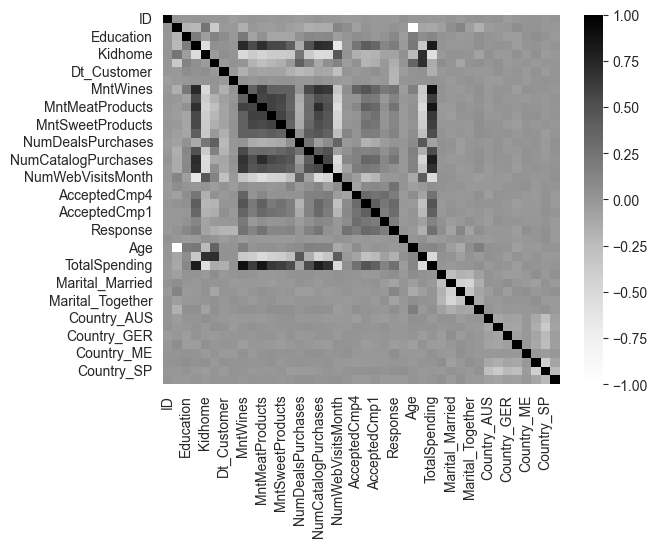

In [174]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = False
sns.heatmap(corr, cmap='Greys', mask=mask,cbar=True)

T-Test =  7.191235235903888e-46
Reject the null hypothesis, older people prefer shopping in store.

Z-Test =  3.0249785398445293e-33
Reject the null hypothesis, older people prefer shopping in store.


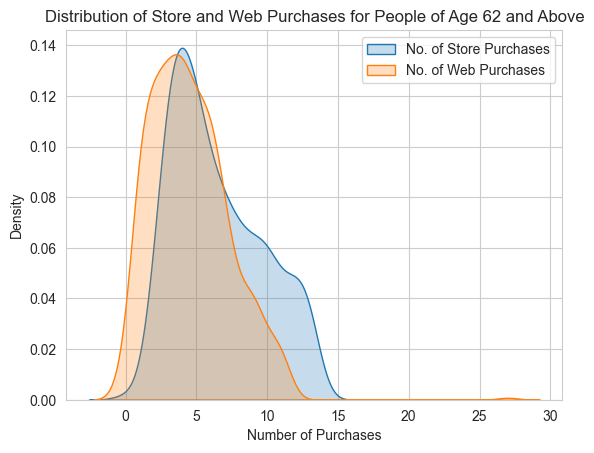

In [175]:
sns.set_style('whitegrid')

a = df[df['Age']>=62]['NumStorePurchases']
b = df[df['Age']>=62]['NumWebPurchases']

sns.kdeplot(a,shade = True, label = 'No. of Store Purchases')
sns.kdeplot(b,shade = True, label = 'No. of Web Purchases')

plt.title('Distribution of Store and Web Purchases for People of Age 62 and Above')
plt.xlabel('Number of Purchases')
plt.ylabel('Density')
plt.legend()

t_stat,p_value = stats.ttest_rel(a,b)

z_test = ztest(a,b,value = 0)

print('T-Test = ', p_value)
if p_value < 0.05:
    print("Reject the null hypothesis, older people prefer shopping in store.")
else:
    print("Fail to reject the null hypothesis, older people don’t have a preference regarding shopping.")
   
print('\nZ-Test = ', z_test[1])
if z_test[1] < 0.05:
    print("Reject the null hypothesis, older people prefer shopping in store.")
else:
    print("Fail to reject the null hypothesis, older people don’t have a preference regarding shopping.")

T-Test =  2.8732134615931844e-92
Reject the null hypothesis, parents prefer online shopping.

Z-Test =  3.610542592028488e-125
Reject the null hypothesis, parents prefer online shopping.


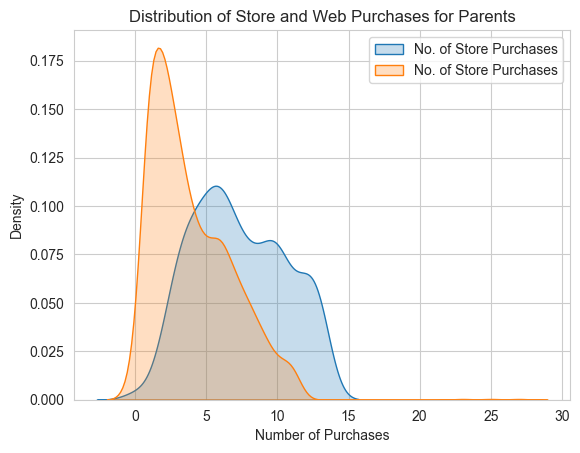

In [176]:
sns.set_style('whitegrid')

a = df[df['Dependents']==0]['NumStorePurchases']
b = df[df['Dependents']>0]['NumWebPurchases']

sns.kdeplot(a,shade = True, label = 'No. of Store Purchases')
sns.kdeplot(b,shade = True, label = 'No. of Store Purchases')
plt.title('Distribution of Store and Web Purchases for Parents')
plt.xlabel('Number of Purchases')
plt.ylabel('Density')
plt.legend()

t_stat,p_value = stats.ttest_ind(a,b,equal_var=False)
z_test = ztest(a,b,value = 0)

print('T-Test = ', p_value)
if p_value < 0.05:
    print("Reject the null hypothesis, parents prefer online shopping.")
else:
    print("Fail to reject the null hypothesis, parents don’t have a preference regarding shopping.")

    
print('\nZ-Test = ', z_test[1])
if z_test[1] < 0.05:
    print("Reject the null hypothesis, parents prefer online shopping.")
else:
    print("Fail to reject the null hypothesis, parents don’t have a preference regarding shopping.")

F-Statistic: 649.0176120357942
P-value: 2.5585966134034163e-258
Reject the null hypothesis, web and catalog sales do impact sales at the store.


[Text(0.5, 1.0, 'Distribution of Sales for Different Distribution Channels'),
 Text(0.5, 0, 'Sales'),
 Text(0, 0.5, 'Frequency')]

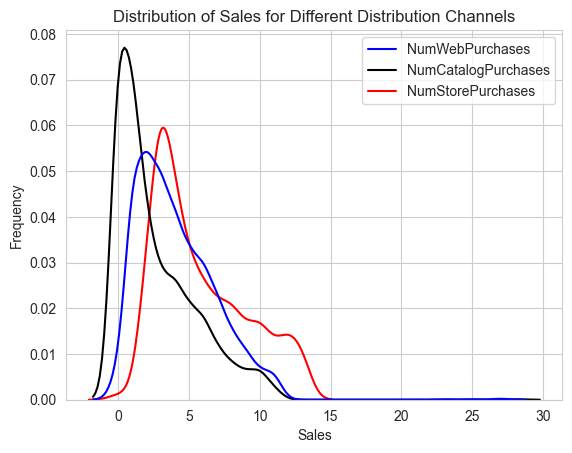

In [177]:
store = df['NumStorePurchases']
catalog = df['NumCatalogPurchases']
web = df['NumWebPurchases']

fvalue, pvalue = stats.f_oneway(store, catalog, web)

print("F-Statistic:", fvalue)
print("P-value:", pvalue)

if pvalue < 0.05:
    print("Reject the null hypothesis, web and catalog sales do impact sales at the store.")
else:
    print("Fail to reject the null hypothesis, web and catalog sales don’t impact sales at the store.")

sns.kdeplot(data=[web,catalog,store], palette=['blue', 'black', 'red']).set(title='Distribution of Sales for Different Distribution Channels', xlabel='Sales', ylabel='Frequency')

T-Test =  0.21375151719679372
Fail to reject the null hypothesis, number of US purchases = number of non-US purchases.

Z-Test =  0.22307804540871568
Fail to reject the null hypothesis, number of US purchases = number of non-US purchases.


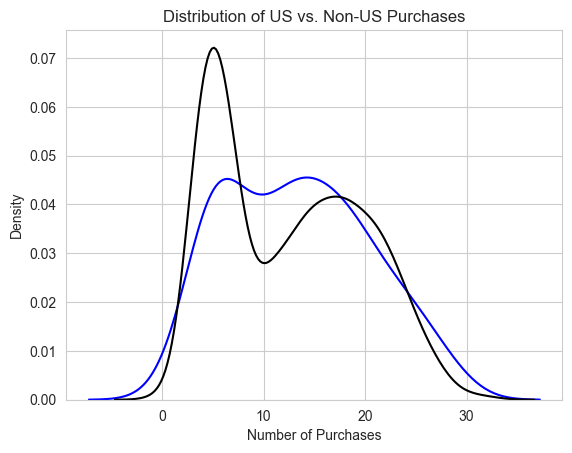

In [178]:
sns.set_style('whitegrid')

a= df[df['Country_US']==1]
b= df[df['Country_US']!=1]

a = a['NumWebPurchases']+a['NumStorePurchases']+a['NumCatalogPurchases']
b = b['NumWebPurchases']+b['NumStorePurchases']+b['NumCatalogPurchases']

sns.kdeplot(a,color='blue', label = 'US Purchases')
sns.kdeplot(b,color='black', label = 'Non-US Purchases').set(title='Distribution of US vs. Non-US Purchases', xlabel='Number of Purchases')

t_stat,p_value = stats.ttest_ind(a,b,equal_var=False)
z_test = ztest(a,b,value = 0)

print('T-Test = ', p_value)
if p_value < 0.05:
    print("Reject the null hypothesis, number of US purchases is higher than number of non-US purchases.")
else:
    print("Fail to reject the null hypothesis, number of US purchases = number of non-US purchases.")

    
print('\nZ-Test = ', z_test[1])
if z_test[1] < 0.05:
    print("Reject the null hypothesis, number of US purchases is higher than number of non-US purchases.")
else:
    print("Fail to reject the null hypothesis, number of US purchases = number of non-US purchases.")

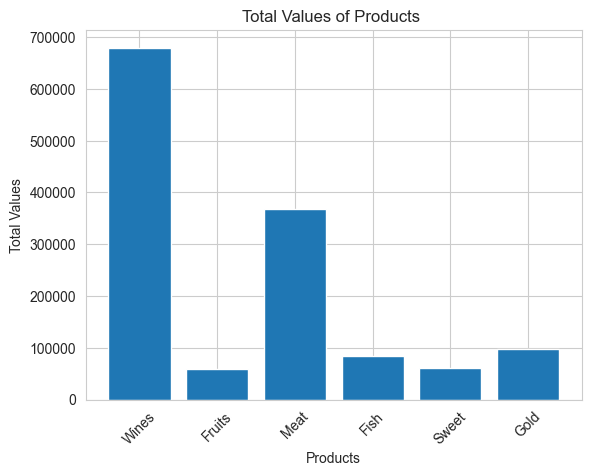

In [179]:
products = ['Wines','Fruits','Meat','Fish','Sweet','Gold']
values = [
    df['MntWines'].sum(),
    df['MntFruits'].sum(),
    df['MntMeatProducts'].sum(),
    df['MntFishProducts'].sum(),
    df['MntSweetProducts'].sum(),
    df['MntGoldProds'].sum()
]

plt.bar(products, values)
plt.xlabel('Products')
plt.ylabel('Total Values')
plt.title('Total Values of Products ')
plt.xticks(rotation=45)
plt.show()

In [180]:
bins = [20, 40, 50, 60, 70, 90]
df['age_bin'] = pd.cut(df['Age'], bins=bins)
df['age_bin'] = df['age_bin'].astype(str)

crosstab = pd.crosstab(df['age_bin'], df['Response'])
fig = go.Figure(data=[
    go.Bar(name='Not Accepted', x=crosstab.index.astype(str), y=crosstab[0]),
    go.Bar(name='Accepted', x=crosstab.index.astype(str), y=crosstab[1])
])

fig.update_layout(
    barmode='stack',
    title = 'Last Offer Acceptance Rate per Age',
    xaxis_title="Age",
    yaxis_title="Offers Accepted (Not Accepted)",
    yaxis=dict(
        tickvals=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650],
        range=[0, 650]
    )
)

# Add annotations to stacked bars
for i, age_bin in enumerate(crosstab.index):
    fig.add_annotation(
        x=age_bin,
        y=crosstab.loc[age_bin].sum() / 2,
        text=str(crosstab.loc[age_bin, 0]),
        showarrow=False
    )
    fig.add_annotation(
        x=age_bin,
        y=crosstab.loc[age_bin, 0] + (crosstab.loc[age_bin, 1] / 2),
        text=str(crosstab.loc[age_bin, 1]),
        showarrow=False
    )

fig.show()

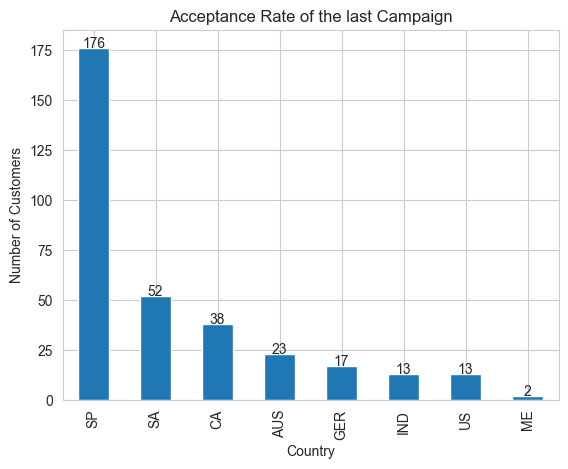

In [181]:
index = response_rate.index
values = response_rate.values

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontsize=10 )
addlabels(index, values)
response_rate.plot(kind='bar')
plt.title("Acceptance Rate of the last Campaign")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.show()

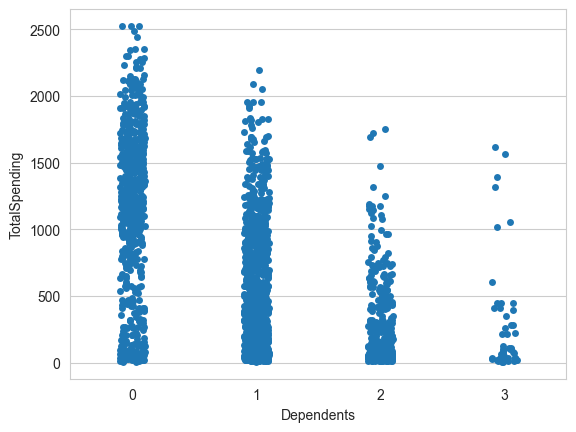

In [182]:
sns.stripplot(x=df["Dependents"], y=df["TotalSpending"]);

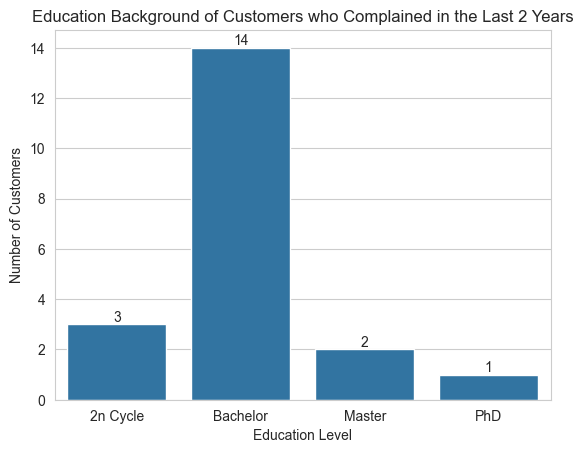

In [183]:
custComplain = df[df['Complain'] == 1]
edCounts = custComplain['Education'].value_counts().sort_index()

sns.countplot(x='Education', data=custComplain )

plt.title("Education Background of Customers who Complained in the Last 2 Years")
plt.xlabel("Education Level")
plt.ylabel("Number of Customers")

for i, count in enumerate(edCounts):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
new_labels = ['2n Cycle', 'Bachelor', 'Master', 'PhD']
plt.gca().set_xticklabels(new_labels)

plt.show()